<a href="https://colab.research.google.com/github/skaria76/intro-ml-course-winter2025/blob/main/Datathon_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd
import io
uploaded = files.upload()

Saving Dataset1.csv to Dataset1.csv


In [2]:
df = pd.read_csv(io.BytesIO(uploaded['Dataset1.csv']))

In [3]:
df.head()

,Age,Gender,Air Pollution,Alcohol Usage,Genetic Risk,Lung Disease,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Severity
0,33,1,2,4,3,2,4,3,2,2,4,0
1,17,1,3,1,4,2,2,2,4,2,3,1
2,35,1,4,5,5,4,7,2,3,4,8,2
3,37,1,7,7,6,7,7,7,7,7,8,2
4,46,1,6,8,7,6,7,8,7,7,9,2


In [4]:
print(df.shape)

(1465, 12)


In [10]:
# Identify column names
print(df.columns)

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol Usage', 'Genetic Risk',
       'Lung Disease', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Severity'],
      dtype='object')


In [6]:
import numpy as np

In [9]:
# Generate summary stats
print(df.describe())

               Age       Gender  Air Pollution  Alcohol Usage  Genetic Risk  \
count  1465.000000  1465.000000    1465.000000    1465.000000   1465.000000   
mean     37.238225     1.404778       3.958362       4.258020      3.892150   
std      12.078575     0.491017       2.033272       2.564265      2.134635   
min      14.000000     1.000000       1.000000       1.000000      1.000000   
25%      28.000000     1.000000       2.000000       2.000000      2.000000   
50%      36.000000     1.000000       4.000000       4.000000      3.000000   
75%      45.000000     2.000000       6.000000       7.000000      6.000000   
max      73.000000     2.000000       8.000000       8.000000      7.000000   

       Lung Disease      Obesity      Smoking  Passive Smoker   Chest Pain  \
count   1465.000000  1465.000000  1465.000000     1465.000000  1465.000000   
mean       3.741297     3.844369     3.425256        3.606826     3.817065   
std        1.899984     2.072213     2.273040        2

In [8]:
# Check for missing values in each column
print(df.isna().sum())

Age                  0
Gender               0
Air Pollution        0
Alcohol Usage        0
Genetic Risk         0
Lung Disease         0
Obesity              0
Smoking              0
Passive Smoker       0
Chest Pain           0
Coughing of Blood    0
Severity             0
dtype: int64


## Findings

### - There are no missing values

### - Age is a continuous value, the remaining features are categorical

### - Categorical values have already been represented numerically

### - All categorical values (besides gender, which is binary) are represented on an ordinal scale, meaning no need for one-hot encoding

In [11]:
# Renaming the column Gender to Sex
df = df.rename(columns={'Gender': 'Sex'})
df

,Age,Sex,Air Pollution,Alcohol Usage,Genetic Risk,Lung Disease,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Severity
0,33,1,2,4,3,2,4,3,2,2,4,0
1,17,1,3,1,4,2,2,2,4,2,3,1
2,35,1,4,5,5,4,7,2,3,4,8,2
3,37,1,7,7,6,7,7,7,7,7,8,2
4,46,1,6,8,7,6,7,8,7,7,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1460,24,1,6,1,3,1,2,2,3,3,2,3
1461,53,1,6,2,2,1,3,4,2,3,1,3
1462,62,1,6,8,1,1,4,3,3,2,2,3
1463,29,1,6,1,2,3,2,4,1,1,3,3


In [17]:
# count the number of males and females represented in the dataset
counts = df['Sex'].value_counts()
count_1 = counts.get(1, 0)  # Count of 1s for male
count_2 = counts.get(2, 0)  # Count of 2s for female

print(f"Count of males: {count_1}")
print(f"Count of females: {count_2}")

Count of males: 872
Count of females: 593


In [54]:
severity_counts = df['Severity'].value_counts()

print(severity_counts)

Severity
3    465
2    365
1    332
0    303
Name: count, dtype: int64


<ipython-input-55-3615132c99bb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=severity_counts.index, y=severity_counts.values, palette="viridis")


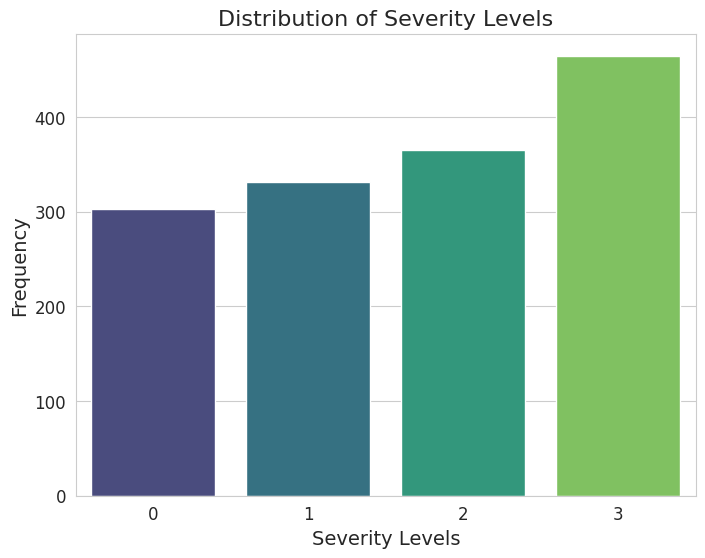

In [55]:
severity_counts2 = df['Severity'].value_counts().sort_index()

# Plot the distribution using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=severity_counts.index, y=severity_counts.values, palette="viridis")

# Add labels and title
plt.xlabel("Severity Levels", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Severity Levels", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

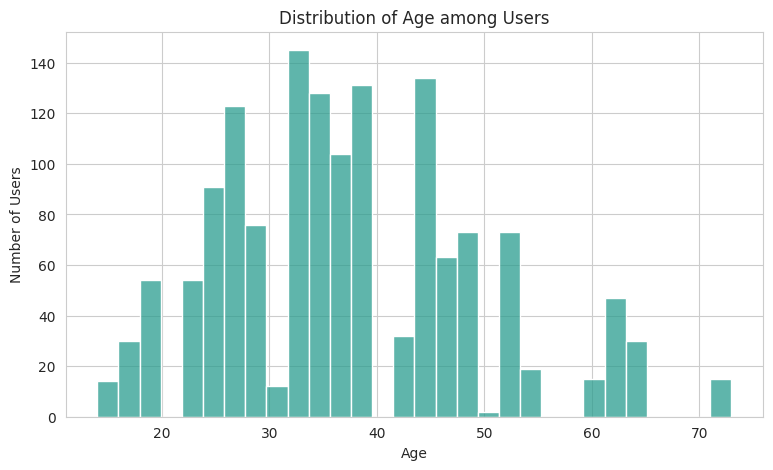

In [18]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set_style('whitegrid')

# Create a histogram for the 'Age' feature
plt.figure(figsize=(9, 5))
sns.histplot(df['Age'], bins=30, kde=False, color='#2a9d8f')
plt.title('Distribution of Age among Users')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

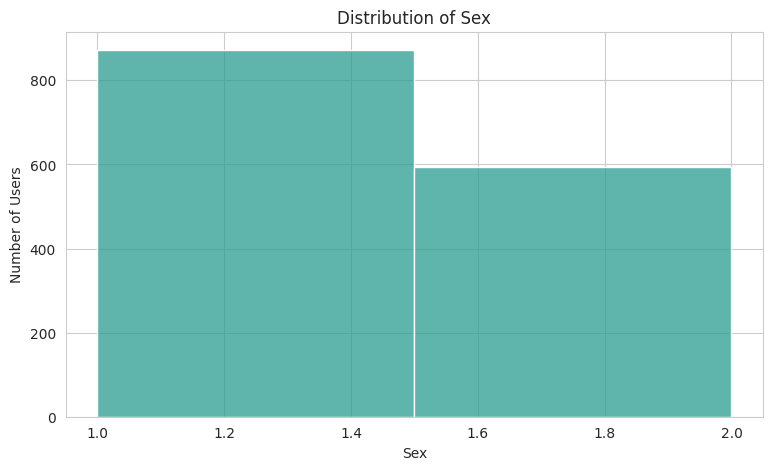

In [20]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set_style('whitegrid')

# Create a histogram for the 'Age' feature
plt.figure(figsize=(9, 5))
sns.histplot(df['Sex'], bins=2, kde=False, color='#2a9d8f')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Users')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
# split data to features and label
X = df[['Age', 'Sex', 'Air Pollution', 'Alcohol Usage', 'Genetic Risk',
       'Lung Disease', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood']]
y = df['Severity']

In [32]:
# split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# scale the features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
# initialize the K-NN classifier and fit the model

knn = KNeighborsClassifier(n_neighbors=2)  # Setting K to 5 as an example
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [51]:
# Predict using the test data.

y_pred = knn.predict(X_test)

In [52]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[55  0  0  2]
 [ 0 58  0  0]
 [ 0  0 80  0]
 [ 5 10  0 83]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        57
           1       0.85      1.00      0.92        58
           2       1.00      1.00      1.00        80
           3       0.98      0.85      0.91        98

    accuracy                           0.94       293
   macro avg       0.94      0.95      0.94       293
weighted avg       0.95      0.94      0.94       293



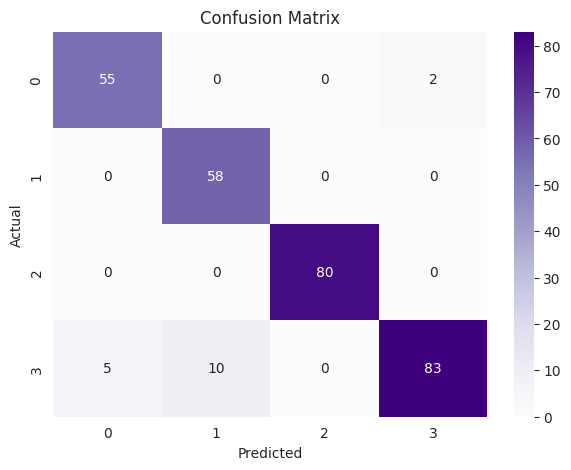

In [56]:
# Get unique classes
classes = df['Severity'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()